c:\Users\damod\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.23625e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\damod\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.454e+00, tolerance: 2.263e-03
  model = cd_fast.enet_coordinate_descent(


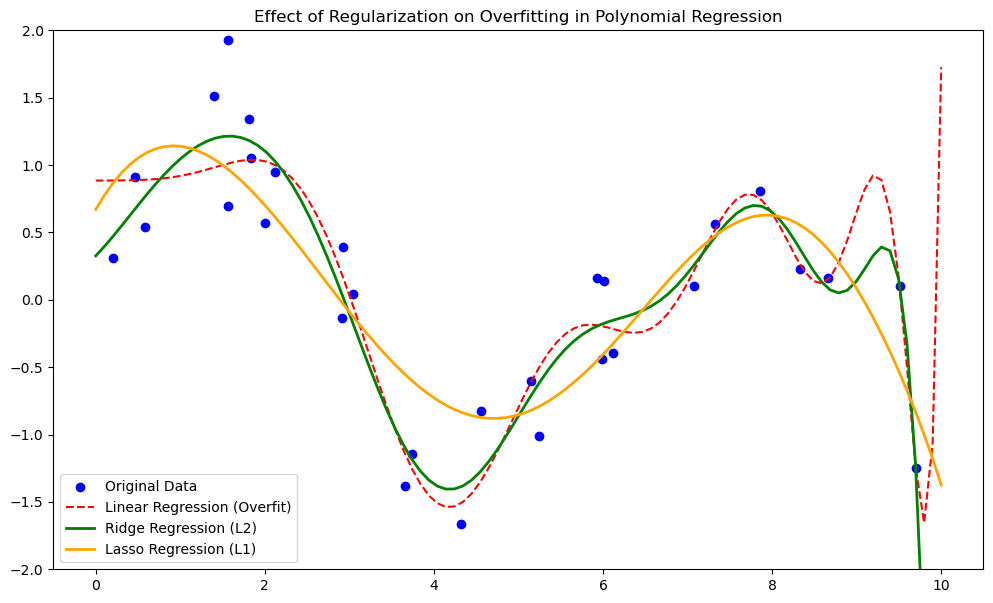

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# 1. Generate some non-linear data
np.random.seed(42)
X = np.random.rand(30, 1) * 10  # Random X values between 0 and 10
y = np.sin(X).ravel() + np.random.randn(30) * 0.5  # y = sin(x) + noise

# 2. Create high-degree polynomial features (to force overfitting)
degree = 15
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# 3. Fit different regression models

# Linear Regression (no regularization — likely to overfit)
lr = LinearRegression()
lr.fit(X_poly, y)

# Ridge Regression (L2 regularization — reduces overfitting)
ridge = Ridge(alpha=0.1)
ridge.fit(X_poly, y)

# Lasso Regression (L1 regularization — reduces overfitting + feature selection)
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_poly, y)

# 4. Visualization
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)

plt.figure(figsize=(12, 7))
plt.scatter(X, y, label='Original Data', color='blue')

plt.plot(X_test, lr.predict(X_test_poly), label='Linear Regression (Overfit)', 
         color='red', linestyle='--')

plt.plot(X_test, ridge.predict(X_test_poly), label='Ridge Regression (L2)', 
         color='green', linewidth=2)

plt.plot(X_test, lasso.predict(X_test_poly), label='Lasso Regression (L1)', 
         color='orange', linewidth=2)

plt.ylim(-2, 2)
plt.title('Effect of Regularization on Overfitting in Polynomial Regression')
plt.legend()
plt.show()
